In [ ]:
import config
import sys
sys.path.append('../util')
import os
from ultralytics import YOLO
from yoloutil import convert_masks_to_yolo_txt, show_yolo_annotation, evaluate_yolo_segmentation, yolo_get_mask
from util import measure_inference_speed

result_path = './yolo11'


In [ ]:
convert_masks_to_yolo_txt(
    input_dir=config.dataset_path,
    class_names=["gland"]
)

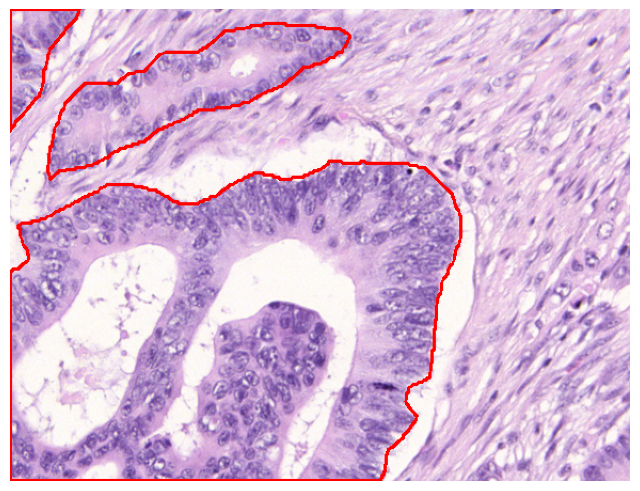

In [3]:
image_path = f"{config.dataset_path}/images/test/testA_3.png"
txt_path   = f"{config.dataset_path}/labels/test/testA_3.txt"

show_yolo_annotation(image_path, txt_path)


In [4]:
model = YOLO("yolo11n-seg.pt")

results = model.train(data=f"{config.dataset_path}/data.yaml", 
                      epochs=300, 
                      imgsz=224, 
                      patience=20, 
                      project=result_path)

os.system('play -nq -t alsa synth 0.2 sine 600; play -nq -t alsa synth 0.2 sine 600')

New https://pypi.org/project/ultralytics/8.3.219 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.203 🚀 Python-3.10.18 torch-2.10.0.dev20250930+cu128 CUDA:0 (NVIDIA GeForce RTX 5070, 11780MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=./dataset/glas-2015//data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=300, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=224, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n-seg.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=t

0

In [ ]:
model = YOLO(f"{result_path}/train/weights/best.pt")

In [5]:
import config
from DatasetReader import get_datasets


_, test_loader, _ = get_datasets(dataset_dir=config.dataset_path, 
                                resolution=config.dataset_resolution, 
                                batch_size=config.batch_size)

metrics = evaluate_yolo_segmentation(model, test_loader, num_classes=config.num_classes)
print(metrics)



Evaluating YOLO Segmentation: 100%|██████████| 2/2 [00:00<00:00,  2.75it/s]

{'Dice': 0.815, 'mIoU': 0.722, 'Precision': 0.785, 'Recall': 0.891, 'F1': 0.815}


In [ ]:
fps, time_per_image, cpu_fps, cpu_time_per_image = measure_inference_speed(model, test_loader)
print("FPS:",fps, "Time per image:",time_per_image)
print("FPS:",cpu_fps, "Time per image:",cpu_time_per_image)


image 1/1 /mnt/TUDAO/DocNanoNet/foot-ulcer/datasets/Foot Ulcer Segmentation Challenge_v2-yolov11-seg/images/test/0504.png: 224x224 2 ulcers, 9.7ms
Speed: 0.6ms preprocess, 9.7ms inference, 1.4ms postprocess per image at shape (1, 3, 224, 224)


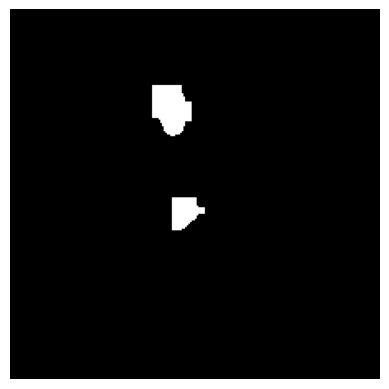

In [ ]:
%matplotlib inline
# carregar o modelo treinado
mask = yolo_get_mask(model, f"{config.dataset_path}/images/test/0504.png", show=True)

In [ ]:
model.info(verbose=True)

YOLO11n-seg summary (fused): 113 layers, 2,834,763 parameters, 0 gradients, 9.6 GFLOPs


(113, 2834763, 0, 9.5717888)